## <center>Project-3 Application Of Classification Models

## <center> Import Libraries and dataset

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

In [3]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/'

In [4]:
train1=pd.read_csv(path + 'adult.data', header=None)
test1=pd.read_csv(path + 'adult.test', skiprows=1, header=None)

In [486]:
## Create a copy of the original dataset to avoid repetetive downloading during iterative data-exploration and models

train=train1.copy()
test=test1.copy()

## <center>Data Exploration

In [438]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [439]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [487]:
# No header in original datasets. Add the same

columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
         'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [488]:
train.columns=columns
test.columns=columns

In [489]:
frames = [train,test]
df = pd.concat(frames, keys=['train', 'test'])

### Check For Catogorical Variables

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Observations:
* <b>class</b>, which is the target variable, is categorical and of type object. So, we have to convert this to integers
* Other <b>categorical variables</b> are 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country'. Will need to convert these to integers
* No Null values in train or test data set. This is because null values were replace by '?' as mentioned in the project description. So, we will convert these to null(nan) forfurther treatment

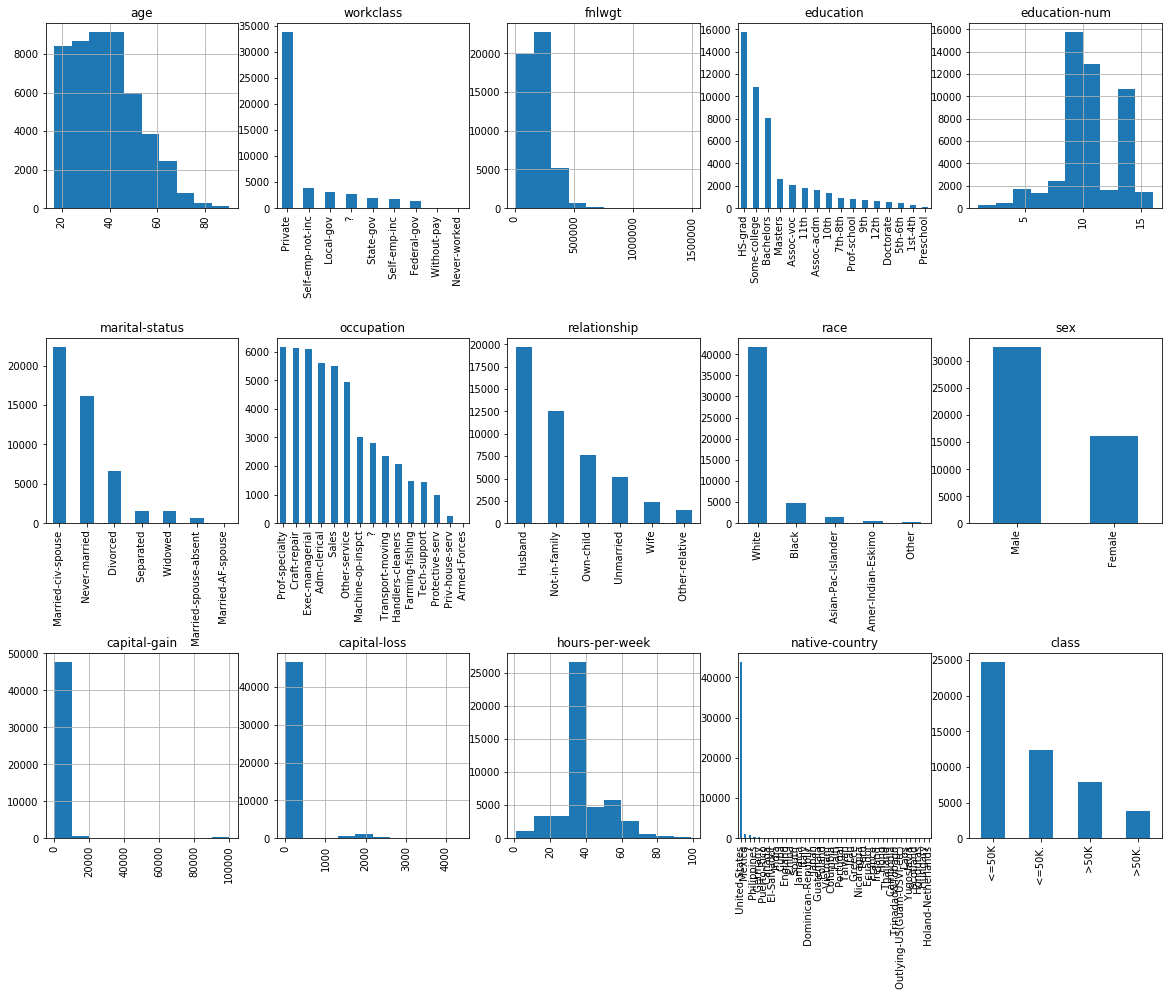

In [491]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [492]:
(df["native-country"].value_counts() / df.shape[0]).head()

 United-States    0.897424
 Mexico           0.019471
 ?                0.017546
 Philippines      0.006040
 Germany          0.004218
Name: native-country, dtype: float64

 ### Observations
 * data is mostly concentrated in the <b>USA </b>with mostly male white people.
 * <b>89%</b> of data is concentrated about USA
 * <b>capital-loss</b> and ,<b>capital-gain</b> are highly <b>left-skewed.</b>

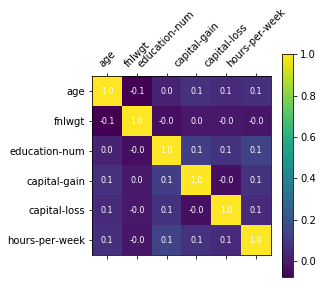

In [493]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(train.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=8)
plt.show()

In [494]:
education = df['education'].unique()
for edu in education:
    print("For {}, the Education Number is {}"
          .format(edu, df[df['education'] == edu]['education-num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


### Relation of Age to Class

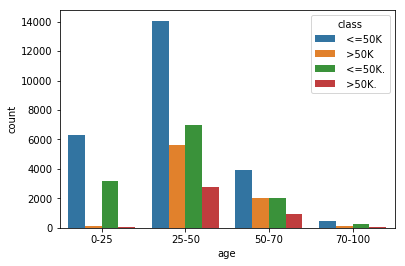

In [495]:
df['age'] = pd.cut(df['age'], bins = [0, 25, 50, 70,100], labels =['0-25','25-50', '50-70', '70-100'])
sns.countplot(x = 'age', hue = 'class', data = df)

In [496]:
# Make 'class' uniform

df['class'].replace([' <=50K.', ' >50K.'],[' <=50K', ' >50K'], inplace=True)

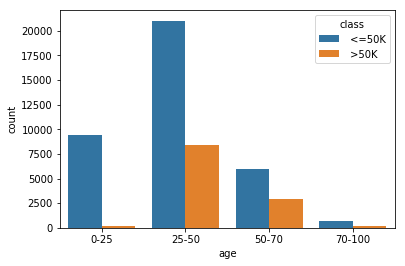

In [497]:
sns.countplot(x = 'age', hue = 'class', data = df)

### Relation of Occupation to Class

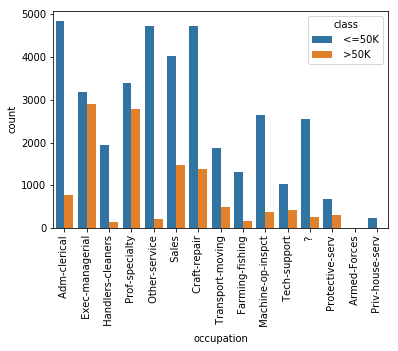

In [498]:
plt.xticks(rotation = 90)
sns.countplot(x = 'occupation', hue = 'class', data = df)
plt.show()

### Relation of Gender to Class

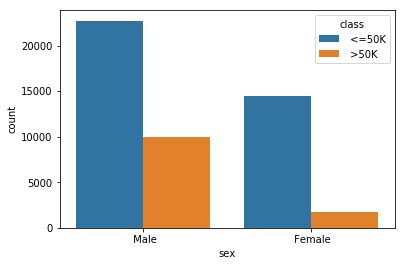

In [499]:
sns.countplot(x = 'sex', hue = 'class', data = df)
plt.show()

### Relation of WorkClass to Class

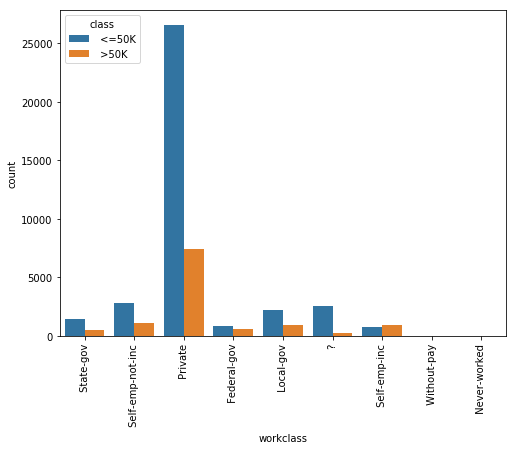

In [500]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'workclass', hue = 'class', data = df)
plt.show()

### Reation of 'Hours-per-week' on 'Class'

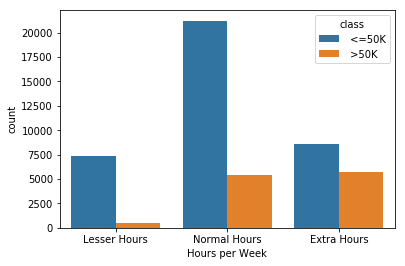

In [501]:
df['Hours per Week'] = pd.cut(df['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'Hours per Week', hue = 'class', data = df)
plt.show()

### Relation of 'Race' on 'Class'

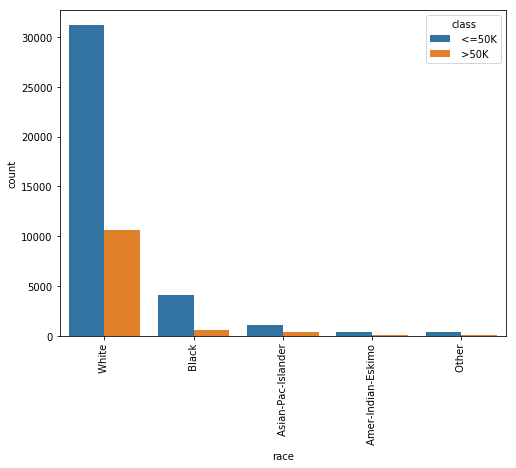

In [502]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'race', hue = 'class', data = df)

### Observations
* From bar charts, males have higher number earning >=50K as compared to females
* Observed that <b>Education Number</b> and <b>Education</b> are just the same. So, I can drop any one column. Let us drop 'Education'.
* Relatiely less Young people who have an income more than $50K. the age group 25-70 have the maximum number of people earning >=50K
* here is not a very high linear correlation between any of the continuous features and the target variable
* No correlation between <b> fnlwgt</b> and <b>class</b>. So, we can drop this.
* Here we observe missing data ' ?' in occupation and workclass.

## <center> Data Preparation

In [503]:
## Drop Columns 'Education' and 'fnlwgt' as deduced above

df= df.drop(columns =['education','fnlwgt'])

In [504]:
# As deduced above, most of the unknown values, missing values, i.e. '?' is in categorical variables. So, we can use most-frequent values
# for impuatation

from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=' ?', strategy='most_frequent')
imp.fit(df)
train=pd.DataFrame(data=imp.transform(df), columns=df.columns)

In [505]:
## Find the types of data for target, i.e. class

print(df['class'].unique())

[' <=50K' ' >50K']


In [506]:
# Convert the target into numeric fields. As there are only 2 difference values, so we can simply do a replace

df['class'].replace([' <=50K', ' >50K'],[0,1], inplace=True)

In [521]:
# Convert the cartegorical variables into integers
cat_var=train.select_dtypes(include=['object','category']).columns.values
#cat_var=df.select_dtypes(include=['object','category'])

for col in cat_var:
     if col not in  ('class', 'education'):
         df[col] = pd.Categorical(df[col]).codes 

In [522]:
# Define X(independent variables) and y(arget variable) for both test and train datasets

train=df.loc['train']  #Separate train and test datasets from he combined dataset df
test=df.loc['test']

y_train=train['class'].astype('int')
y_test=test['class'].astype('int')
X_train=train.drop(columns='class')
X_test=test.drop(columns='class')
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(32561,)
(16281,)
(32561, 13)
(16281, 13)


## <center> Building Models

We'll create the following models before concluding on to the best one 
* <b>Naive Bayes Classifier, 
* Support Vector Classifier,
* Decision Tree Classifier,
* Random Forest Classifier 
* Gradient Boosting Classifier.

In [523]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [524]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.55
Support Vector Classifier:
F1 score: 0.61
Decision Tree Classifier:
F1 score: 0.62
Random Forest Classifier:
F1 score: 0.66
Gradient Boosting Classifier:
F1 score: 0.67


## Analyzing the models

### Accuracy Plot

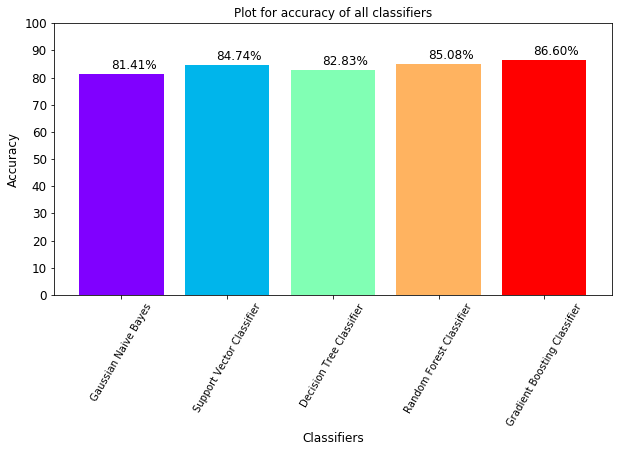

In [525]:
from matplotlib.cm import rainbow

plt.figure(figsize = (10, 5))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 12)
plt.xticks(fontsize = 10, rotation=60)
plt.xlabel("Classifiers", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Plot for accuracy of all classifiers", fontsize = 12)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 12)

### ROC Curve

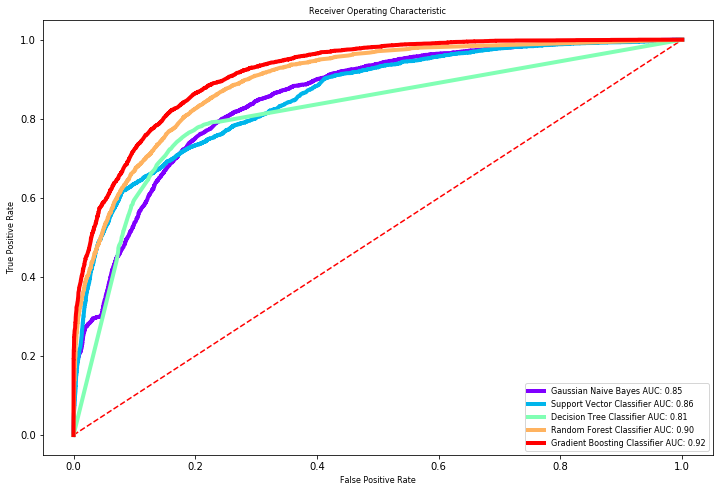

In [526]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (12, 8))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 8)
plt.ylabel('True Positive Rate', fontsize = 8)
plt.title('Receiver Operating Characteristic', fontsize = 8)
plt.legend(loc = 'lower right', fontsize = 8)
plt.show()

## <center>Conclusion

* Gradient Boosting Classifier performed the best with an F1 score of 0.67.
* Gradient Boosting Classifier had the best accuracy 
* Gradient Boosting Classifier has the maximum Area Under Curve with a value of 0.92.